**Weibull distribution has a survival function $S(t) = e^{-\lambda t ^{\gamma}}$ where $\lambda$ is the scale parameter and $\gamma$ is the shape parameter. (1) Derive $f(t)$, $h(t)$ and $H(t)$. (2) It is helpful to plot log $t$ versus log $\{-log(S(t)\}$ and you should see a straight line indeed if the data are from a Weibull distribution. Prove the slope = $\gamma$ (shape parameter) and intercept = log $\lambda$ (where $\lambda$ is scale parameter).**

$$
S(t) = e^{-\lambda t ^{\gamma}}
$$

Solve for $F(t)$.

$$
F(t) = 1 - S(t) = 1 - e^{-\lambda t ^{\gamma}}
$$

Solve for $f(t)$.

$$
f(t) = \frac{d}{dt} F(t)
$$

$$
f(t) = {d \over dt} 1 - e^{-\lambda t ^{\gamma}}
$$

$$
f(t) = - e^{-\lambda t ^{\gamma}} (-\lambda)\gamma t^{\gamma-1}
$$

$$
f(t) = \lambda\gamma t^{\gamma-1} e^{-\lambda t ^{\gamma}} 
$$

Solve for $h(t)$.

$$
h(t) = {f(t) \over S(t)}
$$

$$
h(t) = {\lambda\gamma t^{\gamma-1} e^{-\lambda t ^{\gamma}}  \over e^{-\lambda t ^{\gamma}}}
$$

$$
h(t) = \lambda\gamma t^{\gamma-1}
$$

Solve for $H(t)$.

$$
H(t) = -\ln(S(t))
$$

$$
H(t) = -\ln(e^{-\lambda t ^{\gamma}})
$$

$$
H(t) = -(-\lambda t ^{\gamma})
$$

$$
H(t) = \lambda t ^{\gamma}
$$

**Use R to make the same figure as on Slide 34 from the course notes (Weibull distribution with scale $\lambda = 1$ and shape $\gamma = 1.5$). You may submit your R codes and figure with separate files.**

In [1]:
lambda = 1
gamma = 1.5

t = seq(0, 3, 0.1)

S = exp(-lambda * t ^ gamma)
F = 1 - exp(-lambda * t ^ gamma)
f = lambda*gamma*t^(gamma - 1)*exp(-lambda*t^gamma)
h = lambda*gamma*t^(gamma - 1)
H = lambda*t^gamma

In [16]:
png("plot.png", width="600", height="400")

par(bg="white")
plot(t, h, type="l", col="red", ylab="")
lines(t, f, col="black", xaxt="n", ylab="")
lines(t, F, col="blue")
lines(t, S, col="green")
title("Weibull (λ = 1, γ = 1.5)")
legend(
    "topleft",
    legend=c("f", "h", "S", "F"),
    col=c("black", "red", "green", "blue"),
    lty=c(4, 2, 3),
    cex=1
)

dev.off()

pdf 
  2

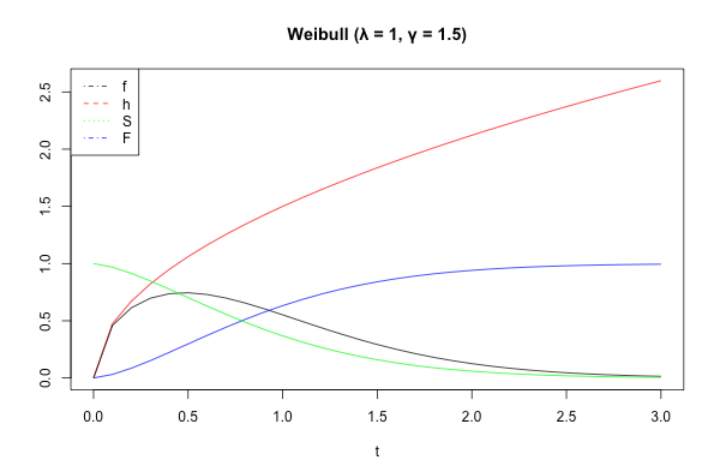

**A random variable $T$ has a log-normal distribution if $X = log(T)$ has a normal p.d.f:**
$$
f(x) = \frac{1}{\sqrt{2\pi} \sigma} e ^{ - \frac{(x - \mu)^2}{2\sigma^2}}.
$$

**(1) Prove T has the p.d.f:**
$$
f(t) = \frac{1}{\sqrt{2\pi} \sigma t} e ^{ - \frac{(log(t) - \mu)^2}{2\sigma^2}}.
$$

Consider the real valued function,

$$
x(t) = \ln(t)
$$

This is defined for all $t \gt 0$ and has image $\R$.

Observe that the absolute value jacobian determinant of this transform is given by,

$$
|J(x(t))| = t^{-1}
$$

Then,

$$
P(T = t) = P(X = x(t))|J(x(t))|I(t \gt 0)
$$

$$
P(T = t) = \left(\frac{1}{\sqrt{2\pi} \sigma} e ^{ - \frac{(\ln(t) - \mu)^2}{2\sigma^2}}\right)t^{-1}I(t \gt 0)
$$

$$
P(T = t) = \frac{1}{\sqrt{2\pi} \sigma t} e ^{ - \frac{(\ln(t) - \mu)^2}{2\sigma^2}}I(t \gt 0)
$$

**(2) Plot $h(t)$ over the time interval (0, 4) in R (see below). Does the hazard function $h(t)$ monotonically increase or decrease when $t$ increases?**

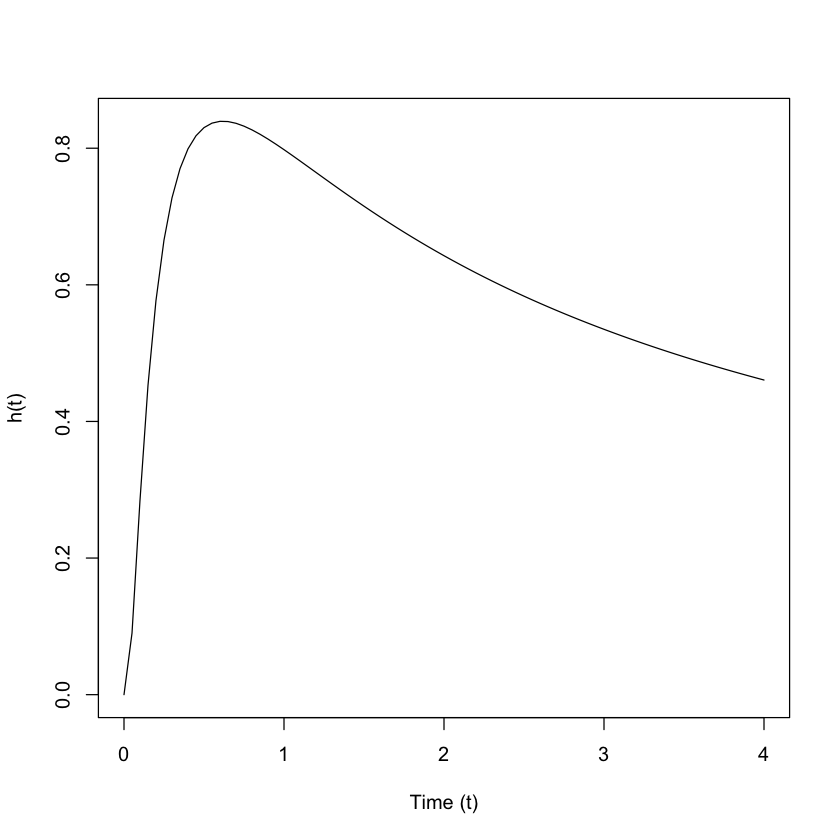

In [9]:
par(bg="white")

time <- seq(0, 4, by=0.05)
logft1 <- dlnorm(time, meanlog=0, sdlog=1, log=FALSE)
logSt1 <- (1- plnorm(time, meanlog=0, sdlog=1, lower.tail=TRUE, log.p=FALSE))
loght1 <- logft1/logSt1
plot(time, loght1, type="l",col=1, ylab="h(t)", xlab="Time (t)") ## h(t)
#plot(time, logSt1)   #### survival curve

The hazard function is neither monotonically increasing nor monotonically decreasing on $t \in [0, 4]$.